In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("data-693fc2b180037028972686.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print(df.shape)
df.info()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

In [4]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.duplicated().sum()

0

In [6]:
df.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

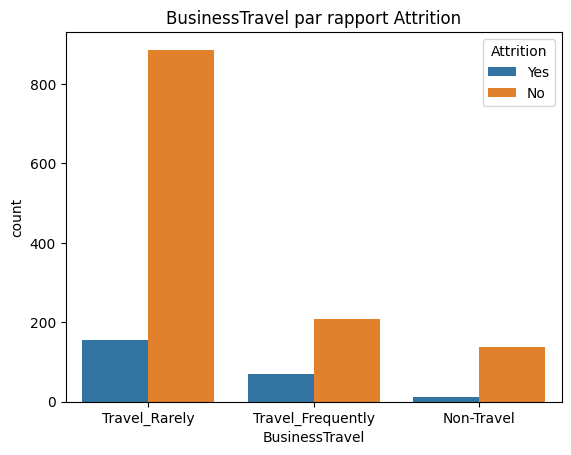

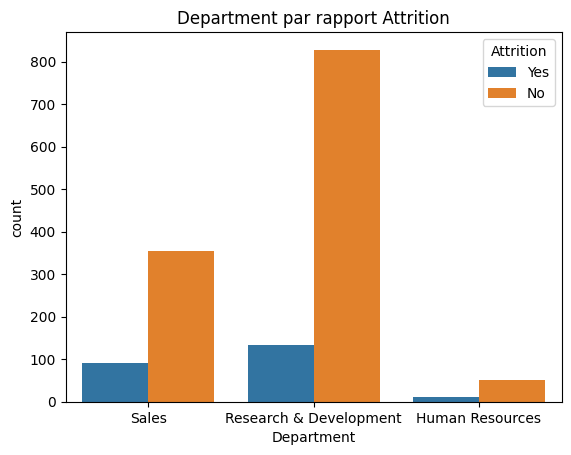

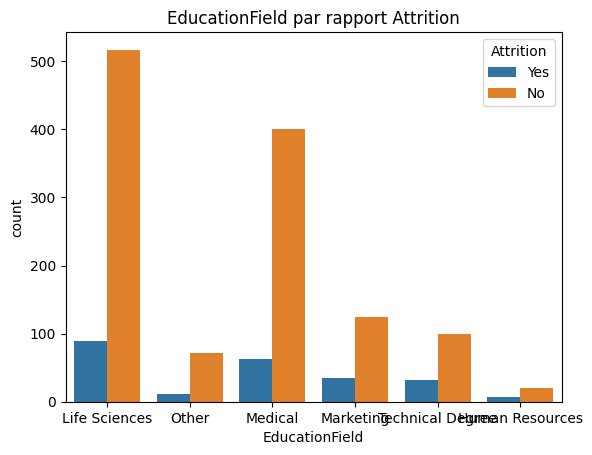

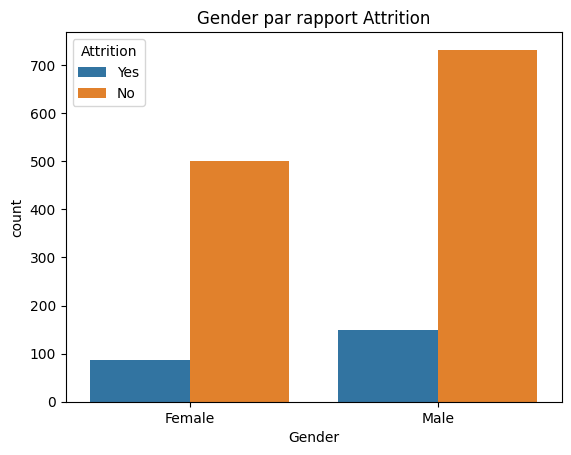

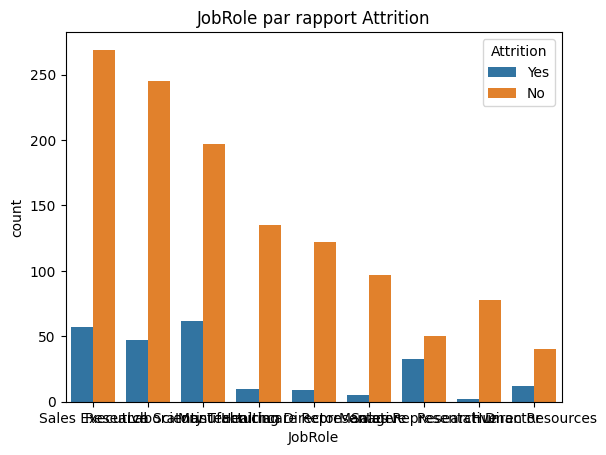

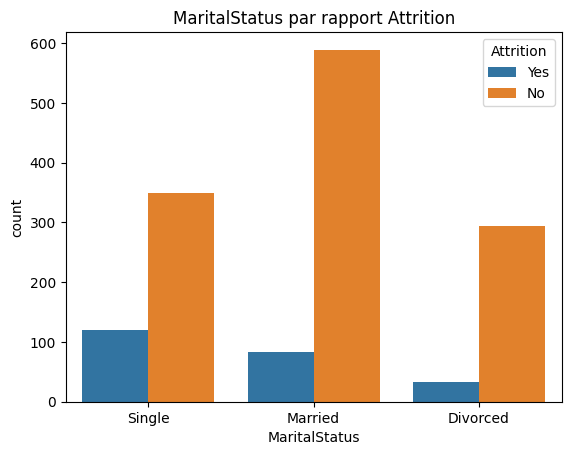

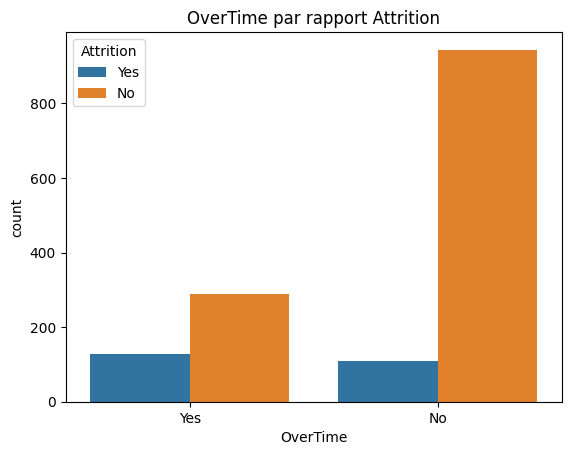

In [7]:
colms=[ 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']
for clm in colms:
    sns.countplot(x=clm,hue='Attrition', data=df)
    plt.title(f"{clm} par rapport Attrition")
    plt.show()

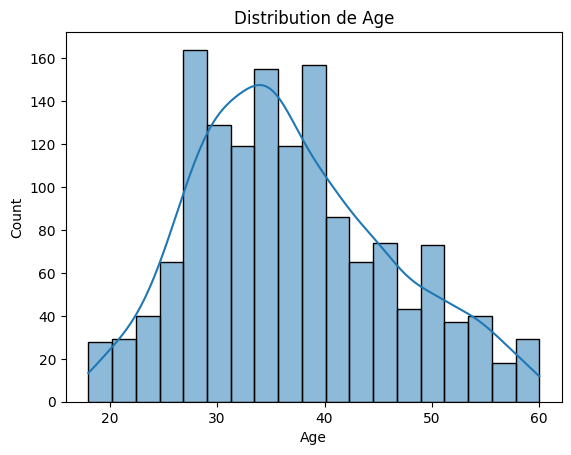

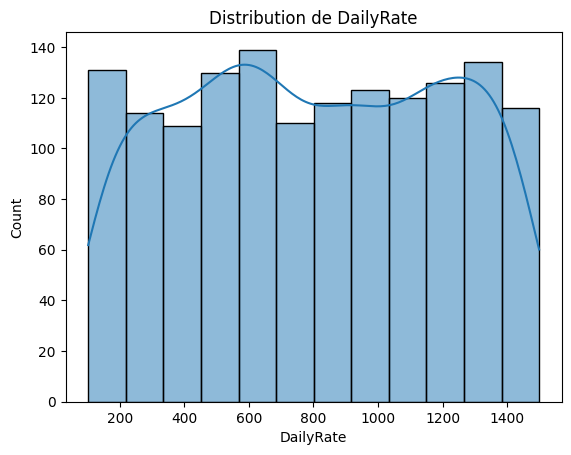

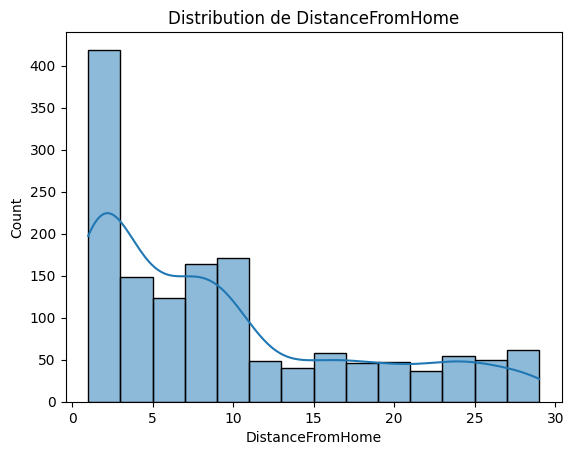

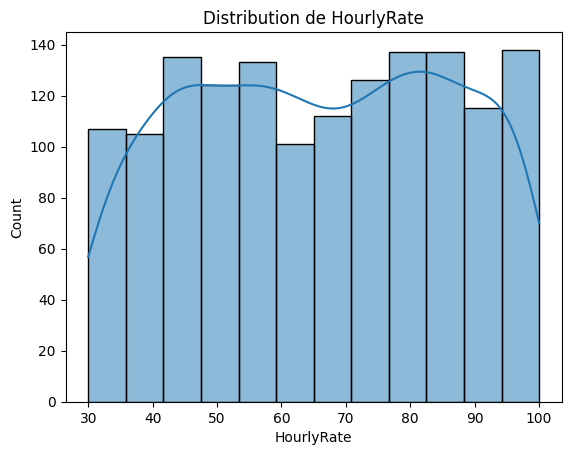

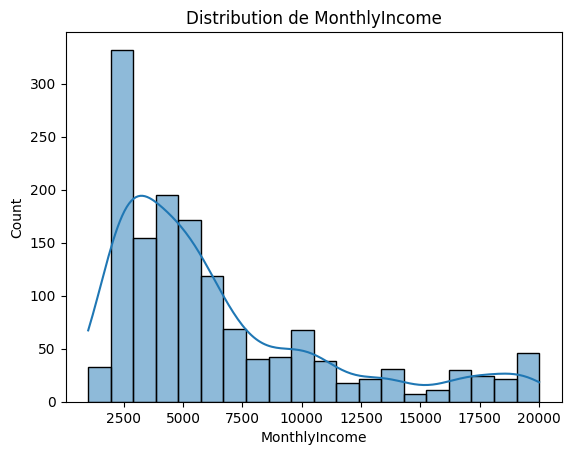

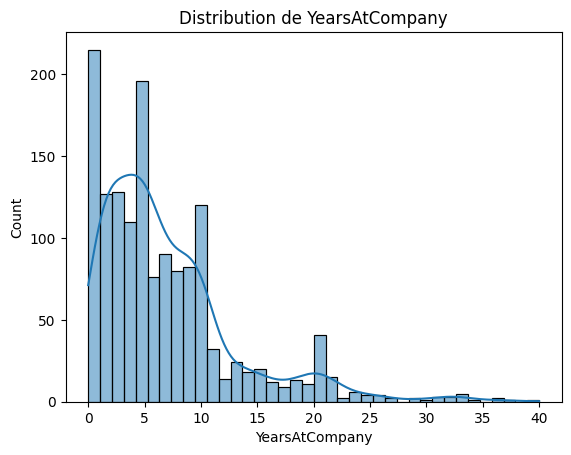

In [8]:
numerical_cols = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "YearsAtCompany"]

for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()


In [9]:
df.select_dtypes(include=["int64", "float64"]).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

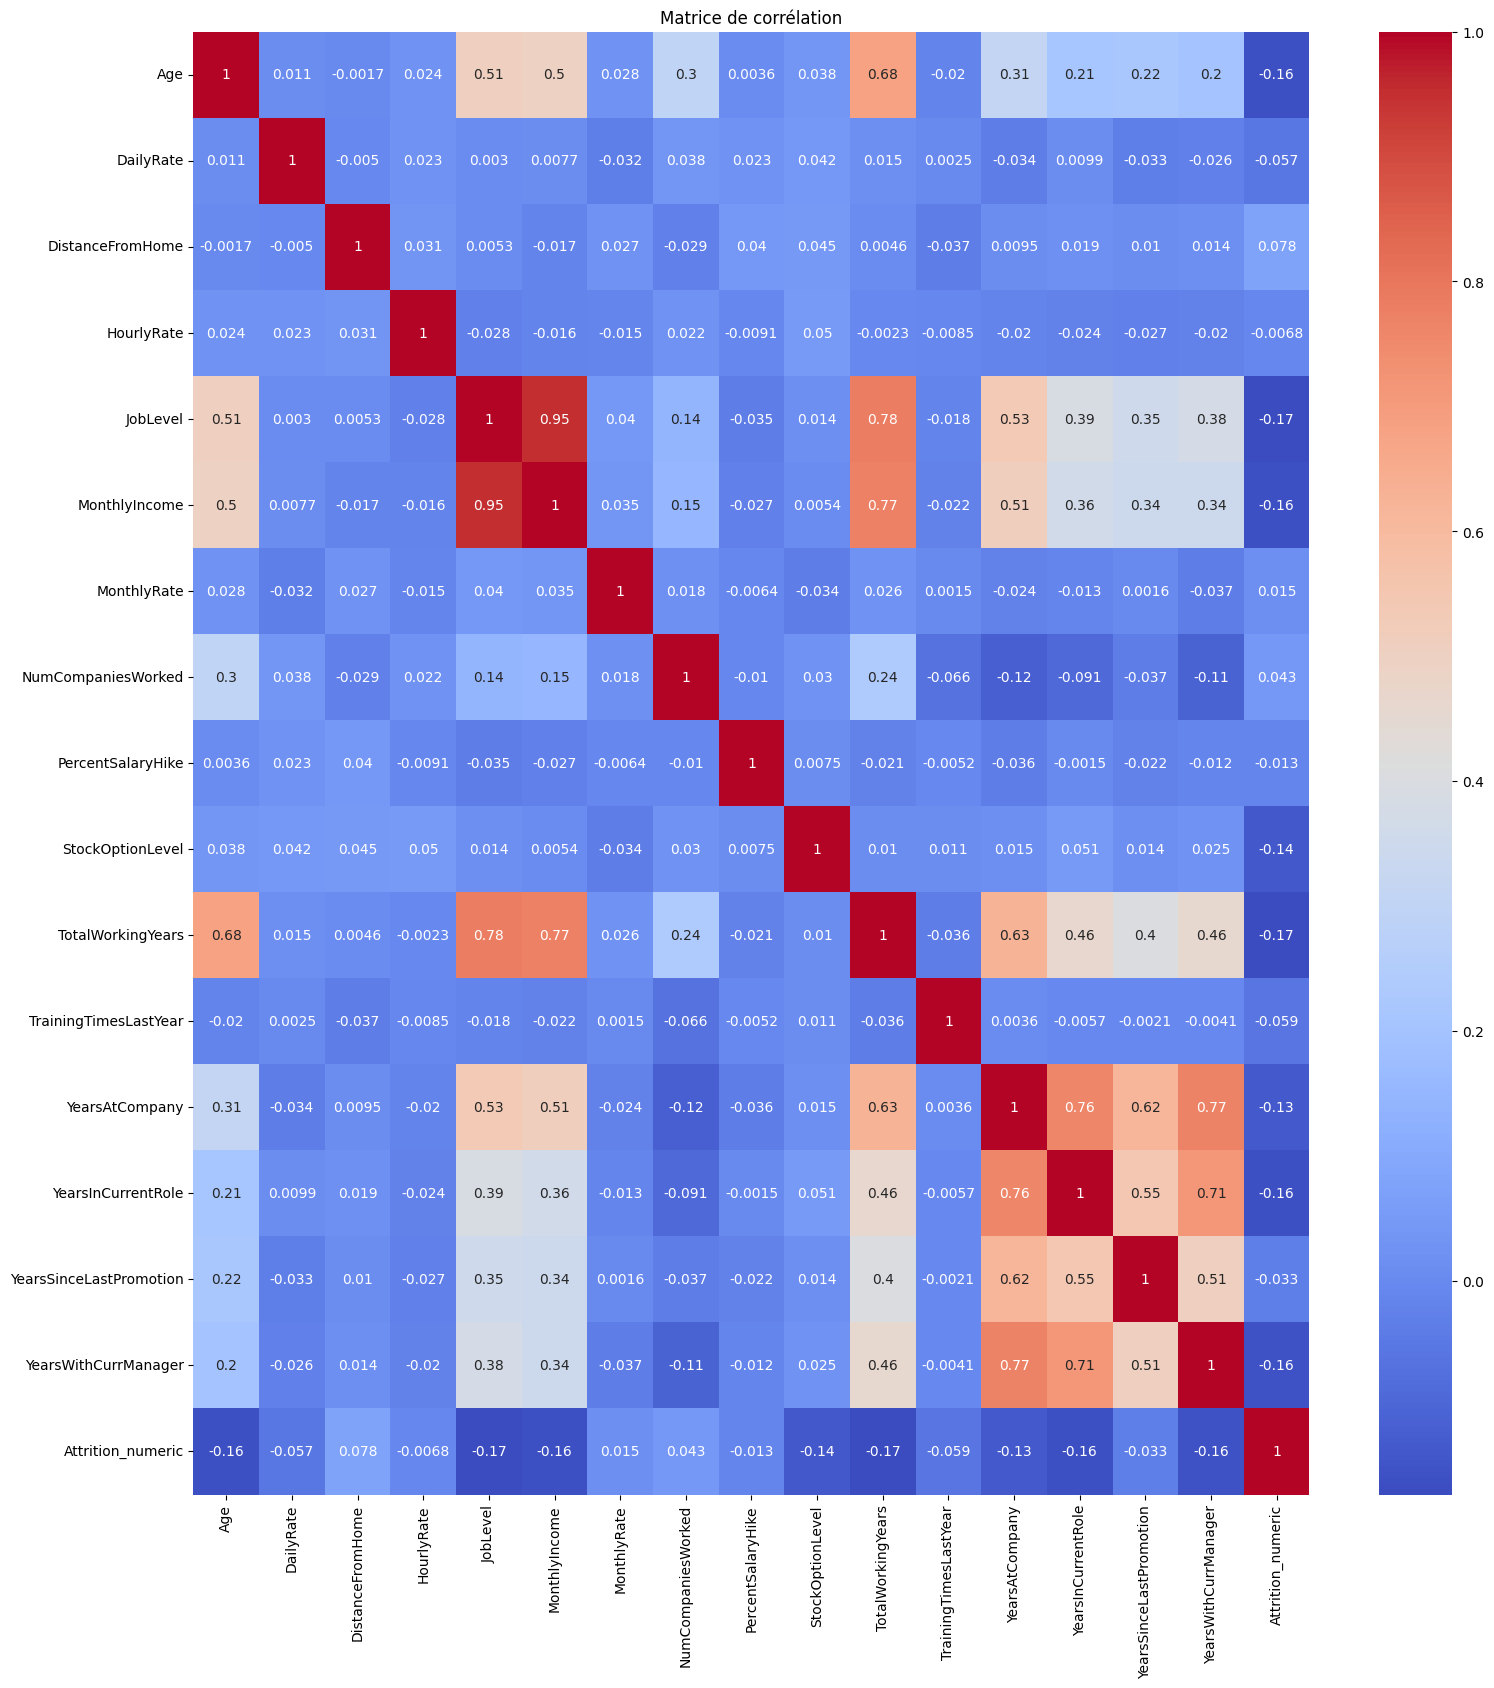

In [10]:
df['Attrition_numeric'] = df['Attrition'].map({'No': 0, 'Yes': 1})
num_cols = ['Age', 'DailyRate', 'DistanceFromHome',
        'HourlyRate', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','Attrition_numeric']
plt.figure(figsize=(18,19))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [11]:
from sklearn.preprocessing import OneHotEncoder


# encoder = OneHotEncoder( drop="first",handle_unknown="ignore",sparse_output=False) 
# encoded = encoder.fit_transform(df[colms]) 
# encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(colms))

# df = pd.concat([df, encoded_df], axis=1) 
# df = df.drop(columns=colms)  
# print(encoded_df)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=["int64", "float64"]).drop(columns=["Attrition_numeric"]).columns

df[num_cols] = scaler.fit_transform(df[num_cols])


In [13]:
colonn =[
     'Over18', 'DistanceFromHome', 'MonthlyRate', 
    'HourlyRate', 'DailyRate', 'EmployeeNumber', 'StandardHours', 
    'EmployeeCount', 'StockOptionLevel', 'NumCompaniesWorked', 
    'PercentSalaryHike', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 
    'YearsSinceLastPromotion'
]

df.drop(columns=colonn, inplace=True, axis=1)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score


# Features et target

X = df.drop(columns=["Attrition", "Attrition_numeric"])
y = df["Attrition_numeric"]
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Préprocesseur
preprocessor = ColumnTransformer([('num', StandardScaler(), num_cols)])

# Pipelines modèles
pipelines = {
    'LogReg': Pipeline([
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42))
    ])
}

# Grids
param_grids = {
    'LogReg': {'model__C':[0.01,0.1,1,10]},
    'RandomForest': {
        'model__n_estimators':[100,200],
        'model__max_depth':[None,10,20],
        'model__min_samples_leaf':[1,2,4]
    }
}

# GridSearch et entraînement
best_models = {}
for name in pipelines:
    grid = GridSearchCV(pipelines[name], param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")
    y_pred = grid.best_estimator_.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.3f}, F1: {f1_score(y_test, y_pred):.3f}")



Best params for LogReg: {'model__C': 1}
LogReg Accuracy: 0.881, F1: 0.186
Best params for RandomForest: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__n_estimators': 200}
RandomForest Accuracy: 0.864, F1: 0.200



🔹 Modèle : LogReg
Best params: {'model__C': 1}
Accuracy: 0.844 | F1-score: 0.511


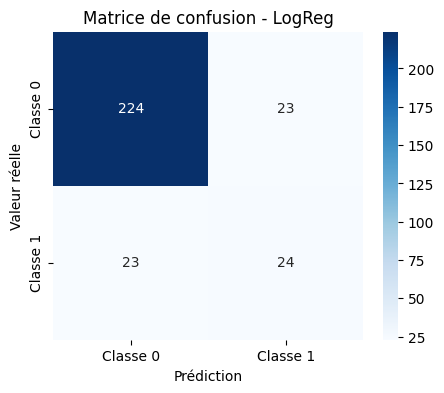


📄 Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       247
           1       0.51      0.51      0.51        47

    accuracy                           0.84       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.84      0.84      0.84       294



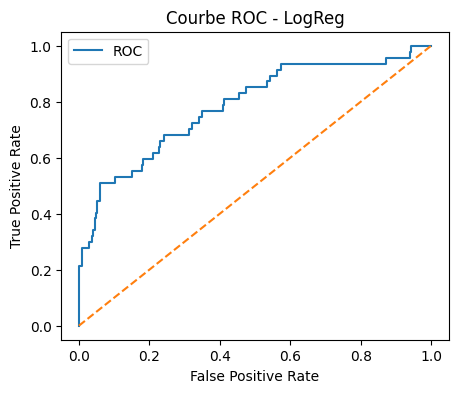


🔹 Modèle : RandomForest
Best params: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__n_estimators': 100}
Accuracy: 0.850 | F1-score: 0.476


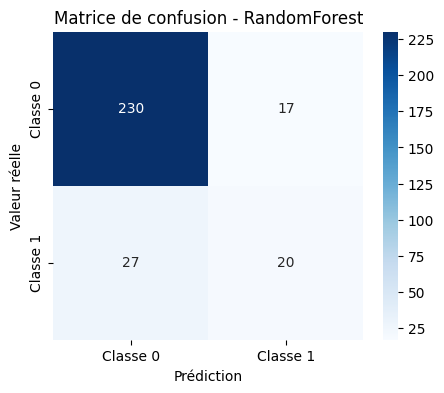


📄 Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       247
           1       0.54      0.43      0.48        47

    accuracy                           0.85       294
   macro avg       0.72      0.68      0.69       294
weighted avg       0.84      0.85      0.84       294



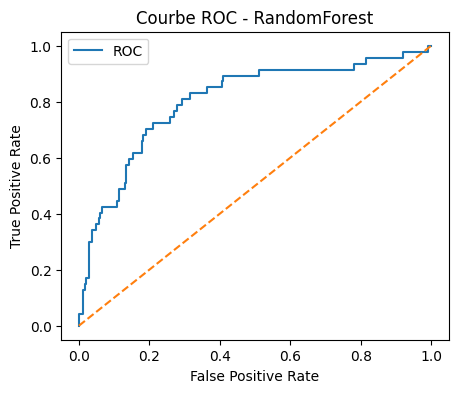

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
import pandas as pd
import joblib

# Séparer features et target
X = df.drop(columns=["Attrition", "Attrition_numeric"])
y = df["Attrition_numeric"]

# Colonnes numériques et catégoriques
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
])

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X[cat_cols])
cat_indices = list(range(len(num_cols), len(num_cols) + ohe.transform(X[cat_cols]).shape[1]))

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipelines
pipelines = {
    'LogReg': Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
        ('model', LogisticRegression(max_iter=1000,class_weight='balanced'))
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
        ('model', RandomForestClassifier(random_state=42,class_weight='balanced'))
    ])
}  

# Grilles de paramètres
param_grids = {
    'LogReg': {'model__C':[0.1, 1, 10]},
    'RandomForest': {
        'model__n_estimators':[50, 100, 200],
        'model__max_depth':[None, 10, 20],
        'model__min_samples_leaf':[1, 2, 4]
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

for name in pipelines:
    grid = GridSearchCV(
        pipelines[name],
        param_grids[name],
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    
    y_pred = grid.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n🔹 Modèle : {name}")
    print(f"Best params: {grid.best_params_}")
    print(f"Accuracy: {acc:.3f} | F1-score: {f1:.3f}")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Classe 0', 'Classe 1'],
        yticklabels=['Classe 0', 'Classe 1']
    )
    plt.xlabel('Prédiction')
    plt.ylabel('Valeur réelle')
    plt.title(f'Matrice de confusion - {name}')
    plt.show()
     # Rapport de classification
    print("\n Rapport de classification :")
    print(classification_report(y_test, y_pred))

     # Courbe ROC
    if hasattr(grid.best_estimator_, "predict_proba"):
        y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
    else:
        y_proba = grid.best_estimator_.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Courbe ROC - {name}')
    plt.legend()
    plt.show()

# joblib.dump(, "model_risk.pkl")
# print(" Modèle sauvegardé sous model_risk.pkl")


In [20]:
best_model = best_models['LogReg'] 

joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']